# Respuestas proyecto final Algoritmos para la ciencia de Datos
## Álvaro Andrés Esquivel Gómez 11002822

In [18]:
import pandas
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [19]:
#EvaluaciÃ³n REGREX
def evaluate_Fx(str_equ, valX):
    x = valX
    #strOut = str_equ
    strOut = str_equ.replace("x", '*(x)')
    strOut = strOut.replace("^", "**")
    out = eval(strOut)
    print(strOut)
    return out


In [20]:
#Deferencias finitas para derivadas
def evaluate_derivate_fx(str_equ, x, h):
    print("evaluate_derivate_fx", str_equ, "  ", x, "  ", h)
    strOut = str_equ.replace("x", '*(x + h)')
    strOut = strOut.replace("^", "**")
    strOut = "-4*(" + strOut + ")"
    #print(strOut)
    out = eval(strOut)

    strOut = str_equ.replace("x", '*(x + 2*h)')
    strOut = strOut.replace("^", "**")
    #print(strOut)
    out = out + eval(strOut)

    strOut = str_equ.replace("x", '*(x)')
    strOut = strOut.replace("^", "**")
    strOut = "3*(" + strOut + ")"
    #print(strOut)
    out = out + eval(strOut)

    out = -out/(2*h)
    #print(out)
    return out

In [21]:
#Resolverdor de Newton
def newtonSolverX(x0, f_x, eps):
    x0 = float(x0)
    eps = float(eps)
    xn = x0
    error = 1
    arrayIters = []
    arrayF_x = []
    arrayf_x = []
    arrayXn = []
    arrayErr = []

    i = 0
    h = 0.000001
    while(error > eps):
        print("...")
        x_n1 = xn - (evaluate_Fx(f_x, xn)/evaluate_derivate_fx(f_x, xn, h))
        error = abs(x_n1 - xn)
        i = i + 1
        xn = x_n1
        arrayIters.append(i)
        arrayXn.append(xn)
        arrayErr.append(error)
        solution = [i, xn, error]

    print("Finalizo...")
    TableOut = pandas.DataFrame({'Iter':arrayIters, 'Xn':arrayXn, 'Error': arrayErr})
    return TableOut



In [22]:
def add(a, b):
    a = int(a)
    b = int(b)
    resultado = a + b
    return "El resultado es: " + str(resultado)


In [23]:
newtonSolverX(-5, "2x^5 - 3", 0.0001)

...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -5.0    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -3.9995200003494134    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -3.1984435630734387    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -2.555888254725259    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -2.0376806285732463    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -1.612743399614275    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -1.2458481366013894    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -0.8721522829875668    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    -0.17921799873782873    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    290.65686316269915    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    232.5254904761196    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    186.02039197456244    1e-06
...
2*(x)**5 - 3
evaluate_derivate_fx 2x^5 - 3    148.81631316048794    

,Iter,Xn,Error
0,1,-3.999520,1.000480
1,2,-3.198444,0.801076
2,3,-2.555888,0.642555
3,4,-2.037681,0.518208
4,5,-1.612743,0.424937
5,6,-1.245848,0.366895
6,7,-0.872152,0.373696
7,8,-0.179218,0.692934
8,9,290.656863,290.836081
9,10,232.525490,58.131373


# Fase 0

## Diferencias finitas centradas

In [7]:
def diferencias_finitas_centradas(funcion, x0, h):
    x0 = float(x0)
    h = float(h)
    funcion = funcion.replace("^", "**")
    #Valor de f(x0 + h)
    funcion_1 = funcion.replace("x", '(x + h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op1 = eval(funcion_1)
    #print("op1: ", op1)
    
    #Valor de f(x0 - h)
    funcion_1 = funcion.replace("x", '(x - h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op2 = eval(funcion_1)
    #print("op2: ", op2)
    
    #Valor f'(x0)
    op3 = (op1 - op2)/(2*h)
    #print("op3: ", op3)
    
    return round(float(op3), 5)
    
    
diferencias_finitas_centradas("x^4", "3", "0.001")
#diferencias_finitas_centradas("2*x^4", 8, 0.01)

108.00001

## Diferencias Finitas Progresiva

In [9]:
def diferencias_finitas_progresivas(funcion, x0, h):
    funcion = funcion.replace("^", "**")
    x0 = float(x0)
    h = float(h)
    
    #Valor de f(x0)
    funcion_1 = funcion.replace("x", '(x)')
    funcion_1 = funcion_1.replace("x", str(x0))
    #print(funcion_1, " con: ", x0, h)
    op0 = eval(funcion_1)
    #print("op0: ", op0)
    
    #Valor de f(x0 + h)
    funcion_1 = funcion.replace("x", '(x + h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op1 = eval(funcion_1)
    #print("op1: ", op1)
    
    #Valor de f(x0 - h)
    funcion_1 = funcion.replace("x", '(x + 2*h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op2 = eval(funcion_1)
    #print("op2: ", op2)
    
    #Valor f'(x0)
    op3 =  (((-3*op0) + (4*op1) - op2))/(2*h)
    #print("op3: ", op3)
    
    resultado = round(float(op3), 5)
    
    return str(resultado)
    
    
diferencias_finitas_progresivas("x^4", "3", "0.01")

'107.99759'

## Diferencias Finitas Centradas 2

In [10]:
def diferencias_finitas_centradas_2(funcion, x0, h):
    funcion = funcion.replace("^", "**")
    x0 = float(x0)
    h = float(h)
    #Valor de f(x0 + h)
    funcion_1 = funcion.replace("x", '(x + h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op1 = eval(funcion_1)
    #print("op1: ", op1)
    
    #Valor de f(x0 - h)
    funcion_1 = funcion.replace("x", '(x - h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op2 = eval(funcion_1)
    #print("op2: ", op2)
    
    #Valor de f(x0 + 2h)
    funcion_1 = funcion.replace("x", '(x + 2*h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op3 = eval(funcion_1)
    #print("op3: ", op3)
    
    #Valor de f(x0 - 2h)
    funcion_1 = funcion.replace("x", '(x - 2*h)')
    funcion_1 = funcion_1.replace("x", str(x0))
    funcion_1 = funcion_1.replace("h", str(h))
    #print(funcion_1, " con: ", x0, h)
    op4 = eval(funcion_1)
    #print("op4: ", op4)
    
    #Valor f'(x0)
    resultado =  ((op4 - (8*op2) + (8*op1) - op3)) / (12*h)
    #print("resultado: ", resultado)
    
    res = round(float(resultado), 5)
    
    return str(res)
    
    
diferencias_finitas_centradas_2("x^4", "3", "0.01")

'108.0'

In [11]:
def derivada(funcion, substituir = False, x = 0):
    funcion = funcion.replace("^", "**")
    #while (funcion.find('x**') != -1):
    pos_elevado = funcion.find('x**')
    elevado = int(funcion[pos_elevado+3:pos_elevado+4])
    primer_termino = funcion[:pos_elevado].replace("(", "")
    
    if(((funcion[pos_elevado+4:].find('+')) != -1) or ((funcion[pos_elevado+4:].find('-')) != -1)):
        funcion = primer_termino +"(" + str(elevado)+"*(x**"+str(elevado-1)+")" + funcion[pos_elevado+4:]
    else:
        funcion = primer_termino +"(" + str(elevado)+"*(x**"+str(elevado-1)+"))"

        
    
    funcion = funcion.replace("*(x)", "*(1)")
    funcion = funcion.replace("e", "(" + str(2.71828))
    
    funcion = re.sub('(\+|\-)\d$', '', funcion)

    if (substituir):
        funcion = funcion.replace("x", str(x))
        resultado = eval(funcion)
        return funcion, resultado
    
    return funcion
    
derivada("x^4")
#derivada("x^4", True, 2)
#derivada("2*(x^4)")
#derivada("2*(x^4)", True, 3)
#derivada("(x^2)-3*(x)-4", True, 1)
#derivada("(e**x)+(x^2)", True, 2)

'(4*(x**3))'

In [13]:
print(diferencias_finitas_centradas("x^4", 3, 0.1))
print(diferencias_finitas_progresivas("x^4", 3, 0.1))
print(diferencias_finitas_centradas_2("x^4", 3, 0.1))

print("Valor exacto:",derivada("x^4", True, 3)[1])

108.12
107.754
108.0
Valor exacto: 108


Cual de los algoritmos anteriores funciona mejor? 
El ultimo de los algoritmos de diferencias finitas centradas funciona mejor.

por que? Porque produce aproximaciones mas cercanas a la realidad con valores de h que son mas grandes, sin embargo, con valores de h muy pequeños la aproximación de todos es igual.

que sucede cuando varia el valor de h? Cuando el valor de h aumenta, la aproximacion se aleja, es decir produce resultados que varian mas que el resultado real. Cuando el valor de h disminuye el valor de la aproximacion es mucho mas cercana a los valores reales de la derivada.

# Fase 1

## Metodo de la Biseccion

In [38]:
def metodo_biseccion(ecuacion, a, b, kmax, epsilon):
    a = int(a)
    b = int(b)
    kmax = int(kmax)
    epsilon = float(epsilon)
    ecuacion = ecuacion.replace("^", "**")
    ecuacion = ecuacion.replace("e", str(2.71828))
    k = 0
    Fxk = 1
    xk = (a + b)/2
    lista_k = []
    lista_x = []
    lista_error = []
    
    while (abs(Fxk) > epsilon) and (k < kmax):    
        #Calculo de Fa
        opFa = ecuacion.replace("x", str(a))
        Fa = eval(opFa)
        #print("Fa ", Fa)

        #Calculo de Fxk
        opFxk = ecuacion.replace("x", str(xk))
        Fxk = eval(opFxk)
        #print("Fxk error ", Fxk)

        if ((Fa * Fxk) < 0):
            b = xk
        else:
            a = xk

        xk = (a + b)/2
        k+=1
        
        lista_k.append(k)
        lista_x.append(xk)
        lista_error.append(abs(Fxk))
    
        #print(a, b, xk, Fa, Fxk, (Fa * Fxk), abs(Fxk))        
    
    TableOut = pandas.DataFrame({'Iter':lista_k, 'Xn':lista_x, 'Error': lista_error})
    return TableOut
    
metodo_biseccion("(x^2)-3*(x)-4", 0, 10, 20, 0.01)
#metodo_biseccion("(e**x)+(x^2)", "-3", 5, 20, 0.01)

,Iter,Xn,Error
0,1,2.500000,6.000000
1,2,3.750000,5.250000
2,3,4.375000,1.187500
3,4,4.062500,2.015625
4,5,3.906250,0.316406
5,6,3.984375,0.459961
6,7,4.023438,0.077881
7,8,4.003906,0.117737
8,9,3.994141,0.019547
9,10,3.999023,0.029263


## Metodo de Newton

In [42]:
def metodo_newton(ecuacion, x, kmax, epsilon):
    ecuacion_1 = ecuacion.replace("^", "**")
    ecuacion_1 = ecuacion_1.replace("e", str(2.71828))
    x = int(x)
    kmax = int(kmax)
    epsilon = float(epsilon)
    #print(ecuacion_1)
    k = 1
    Fx = 1
    lista_k = []
    lista_x = []
    lista_error = []
    
    while (abs(Fx) > epsilon) and (k < kmax):    
        #Calculo de x + 1
        
        Fx = ecuacion_1.replace("x", str(x))
        Fx = eval(Fx)
        
        F_prima_x = derivada(ecuacion, True, x)[1]
        h = (Fx / F_prima_x)
        #print(k, " x ", x, "h ", h)
        x = x - h
        #print(x)
        #print("k: ", k, " x: ", x, " error: ", abs(Fx))
        
        
        lista_k.append(k)
        lista_x.append(x)
        lista_error.append(abs(Fx))
        k+=1
    
    TableOut = pandas.DataFrame({'Iter':lista_k, 'Xn':lista_x, 'Error': lista_error})
    return TableOut
    
metodo_newton("(x^2)-3*(x)-4", 8, 20, 0.01)
#metodo_newton("(e**x)+(x^2)", 1, 10, 0.01)
#metodo_newton("(x^3)-(x)-1", 1, 20, 0.01)

,Iter,Xn,Error
0,1,5.230769,36.000000
1,2,4.203013,7.668639
2,3,4.007624,1.056282
3,4,4.000012,0.038177
4,5,4.000000,0.000058


En terminos de convergencia el metodo de Newton es mas rapido que el de Biseccion, ya que con menos interaciones se lleva al minimo.

La desventaja del metodo de Newton es que requiere la derivada exacta para calcular, lo que en muchas ocaciones puede ser muy complicado de obtener. 
Otra desventaja es que hay que realizar pruebas de convergencia cuadratica para Newton para dereteminar si el algoritmo converge o no. Y hay que tener cuidado con el punto inicial del algoritmo, debido a que si es un punto estacionario su derivada puede ser 0 y quedaria una division por cero.

La ventaja del algoritmo de Newton es la rapida convergecia en muy pocas iteraciones.


Una ventaja del metodo de biseccion es que no requiere derivadas. Las desventajas es que requiere un intervalo en el cual exista la raiz de la ecuacion, ademas, que es mas lento que el metodo de Newton.

# Fase 2

k:  1 
x 
 [[0.67647059]
 [0.88235294]
 [0.20588235]] 
vec_gradiente 
 [[-3]
 [ 2]
 [ 5]] 
norm_vec_gradiente  6.164414002968976
k:  2 
x 
 [[-0.94955987]
 [-0.09326533]
 [-0.37948861]] 
vec_gradiente 
 [[1.47058824]
 [0.88235294]
 [0.52941176]] 
norm_vec_gradiente  1.7948407414579246
k:  3 
x 
 [[-0.6299585 ]
 [-0.54638722]
 [-0.51206708]] 
vec_gradiente 
 [[-0.80585441]
 [ 1.14251781]
 [ 0.33428811]] 
norm_vec_gradiente  1.4375315038220577
k:  4 
x 
 [[-0.7911677 ]
 [-0.57410297]
 [-0.80596151]] 
vec_gradiente 
 [[0.28647023]
 [0.04925114]
 [0.52225306]] 
norm_vec_gradiente  0.5976948437172899
k:  5 
x 
 [[-0.78743189]
 [-0.77782058]
 [-0.78879909]] 
vec_gradiente 
 [[-0.00823244]
 [ 0.44892328]
 [-0.03782004]] 
norm_vec_gradiente  0.45058876663613395
k:  6 
x 
 [[-0.90038681]
 [-0.78927977]
 [-0.90023219]] 
vec_gradiente 
 [[0.2029568 ]
 [0.02058982]
 [0.2002224 ]] 
norm_vec_gradiente  0.285839837884169
k:  7 
x 
 [[-0.89516991]
 [-0.89006948]
 [-0.89515565]] 
vec_gradiente 
 [[-0.0

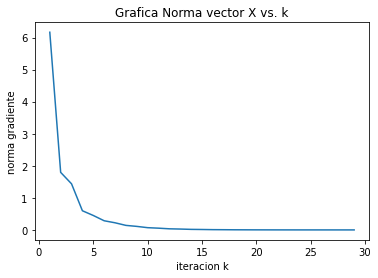

,Iter,Xn,p,Error
0,1,"[[0.6764705882352942], [0.8823529411764706], [...","[[-3], [2], [5]]",6.164414
1,2,"[[-0.9495598714545199], [-0.09326533463741749]...","[[1.4705882352941178], [0.8823529411764703], [...",1.794841
2,3,"[[-0.6299584954667428], [-0.5463872161202186],...","[[-0.8058544082716224], [1.1425178147268418], ...",1.437532
3,4,"[[-0.7911677043680653], [-0.5741029666880436],...","[[0.28647022518673304], [0.04925113993484165],...",0.597695
4,5,"[[-0.7874318913188008], [-0.7778205784460155],...","[[-0.00823244204808704], [0.4489232760997909],...",0.450589
5,6,"[[-0.9003868125329408], [-0.789279774244429], ...","[[0.20295679580841397], [0.02058982146849664],...",0.285840
6,7,"[[-0.895169913325178], [-0.8900694763045934], ...","[[-0.0114938508214526], [0.22205945594930943],...",0.222638
7,8,"[[-0.9506738145174715], [-0.8957387712788755],...","[[0.09972964965423736], [0.010186613723112137]...",0.141427
8,9,"[[-0.9481280316677735], [-0.9456080137335932],...","[[-0.0056088577560675645], [0.1098716991374749...",0.110158
9,10,"[[-0.9755945452018099], [-0.9484130963579259],...","[[0.049351950398046185], [0.005040184600311304...",0.069976


In [53]:
def gd_cuadratica(Q, c, epsilon, N, x0, tipo_step_size = 1, lr = 0):
    k = 1
    x = []
    y = []
    lista_k = []
    lista_x = []
    lista_p = []
    lista_error = []
    
    vec_gradiente = np.dot(Q, x0) + c
    norm_vec_gradiente = np.linalg.norm(vec_gradiente)
    
    while (norm_vec_gradiente > epsilon) and (k < N):
        #print("---------------",k)
        
        vec_gradiente = np.dot(Q, x0) + c
        #print("vec_gradiente\n", vec_gradiente)
        
        #tipo_step_size = 1 Utiliza step size exacto
        if (tipo_step_size == 1):
            alfa = np.dot(vec_gradiente.T, vec_gradiente) / np.dot(np.dot(vec_gradiente.T, Q), vec_gradiente)
            #print("alfa\n", alfa)
        #tipo_step_size = 2 Utiliza step size constante
        elif(tipo_step_size == 2):
            alfa = lr
        #tipo_step_size = 3 Utiliza Step size variable
        else:
            alfa = 1/k
        
        x0 = x0 - (alfa*vec_gradiente)
        norm_vec_gradiente = np.linalg.norm(vec_gradiente)
        
        y.append(norm_vec_gradiente)
        x.append(k)
        
        lista_k.append(k)
        lista_x.append(x0)
        lista_p.append(vec_gradiente)
        lista_error.append(norm_vec_gradiente)
        print("k: ", k, "\nx \n", x0, "\nvec_gradiente \n", vec_gradiente
              , "\nnorm_vec_gradiente ", norm_vec_gradiente)
        k+=1
        
    plt.title('Grafica Norma vector X vs. k')
    plt.xlabel('iteracion k')
    plt.ylabel('norma gradiente')
    plt.plot(x, y)
    plt.show()
        
    TableOut = pandas.DataFrame({'Iter':lista_k, 'Xn':lista_x, 'p':lista_p, 'Error': lista_error})
    return TableOut


Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([[1],[0],[1]])
#x0 = np.array([[3],[5],[7]])
epsilon = 1E-6
N = 30

#Segunda prueba
x0 = np.array([[-1],[2],[3]])


#print(Q, "\n\n", c, "\n\n", x0, "\n\n", epsilon, "\n\n", N)
gd_cuadratica(Q, c, epsilon, N, x0)
#gd_cuadratica(Q, c, epsilon, N, x0, 2, 0.01)

k:  1 
x 
 [[-0.997]
 [ 1.998]
 [ 2.995]] 
vec_gradiente 
 [[-3]
 [ 2]
 [ 5]] 
norm_vec_gradiente  6.164414002968976
k:  2 
x 
 [[-0.994008]
 [ 1.996002]
 [ 2.990008]] 
vec_gradiente 
 [[-2.992]
 [ 1.998]
 [ 4.992]] 
norm_vec_gradiente  6.153383784553016
k:  3 
x 
 [[-0.99102398]
 [ 1.994006  ]
 [ 2.98502399]] 
vec_gradiente 
 [[-2.984018]
 [ 1.996004]
 [ 4.984014]] 
norm_vec_gradiente  6.14237665277342
k:  4 
x 
 [[-0.98804793]
 [ 1.99201198]
 [ 2.98004794]] 
vec_gradiente 
 [[-2.97605396]
 [ 1.99401199]
 [ 4.97604198]] 
norm_vec_gradiente  6.131392560261769
k:  5 
x 
 [[-0.98507982]
 [ 1.99001996]
 [ 2.97507986]] 
vec_gradiente 
 [[-2.96810784]
 [ 1.99202395]
 [ 4.9680839 ]] 
norm_vec_gradiente  6.120431459746792
k:  6 
x 
 [[-0.98211964]
 [ 1.98802992]
 [ 2.97011972]] 
vec_gradiente 
 [[-2.9601796 ]
 [ 1.99003988]
 [ 4.96013976]] 
norm_vec_gradiente  6.109493304054132
k:  7 
x 
 [[-0.97916737]
 [ 1.98604186]
 [ 2.96516751]] 
vec_gradiente 
 [[-2.9522692 ]
 [ 1.98805976]
 [ 4.9522095

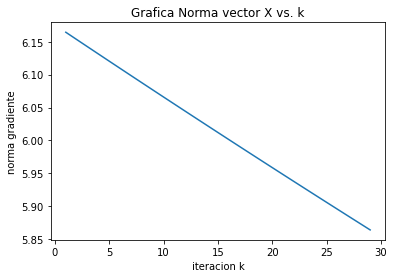

,Iter,Xn,p,Error
0,1,"[[-0.997], [1.998], [2.995]]","[[-3], [2], [5]]",6.164414
1,2,"[[-0.994008], [1.996002], [2.990008]]","[[-2.992], [1.9980000000000002], [4.992]]",6.153384
2,3,"[[-0.991023982], [1.994005996], [2.985023986]]","[[-2.984018], [1.9960040000000006], [4.984014]]",6.142377
3,4,"[[-0.98804792804], [1.992011984012], [2.980047...","[[-2.9760539599999998], [1.9940119880000005], ...",6.131393
4,5,"[[-0.9850798201999079], [1.9900199600599602], ...","[[-2.9681078400920002], [1.9920239520400007], ...",6.120431
5,6,"[[-0.9821196405994481], [1.9880299201797602], ...","[[-2.9601796004597762], [1.9900398801998644], ...",6.109493
6,7,"[[-0.9791673713980694], [1.986041860419161], [...","[[-2.9522692013786562], [1.9880597605991843], ...",6.098578
7,8,"[[-0.9762229947948541], [1.9840557768377638], ...","[[-2.9443766032153], [1.9860835813971471], [4....",6.087686
8,9,"[[-0.9732864930284266], [1.9820716655069714], ...","[[-2.936501766427472], [1.984111330792397], [4...",6.076816
9,10,"[[-0.9703578483768628], [1.9800895225099486], ...","[[-2.9286446515638245], [1.982142997022903], [...",6.065969


In [54]:
gd_cuadratica(Q, c, epsilon, N, x0, 2, 0.001)

k:  1 
x 
 [[-0.97]
 [ 1.98]
 [ 2.95]] 
vec_gradiente 
 [[-3]
 [ 2]
 [ 5]] 
norm_vec_gradiente  6.164414002968976
k:  2 
x 
 [[-0.9408]
 [ 1.9602]
 [ 2.9008]] 
vec_gradiente 
 [[-2.92]
 [ 1.98]
 [ 4.92]] 
norm_vec_gradiente  6.054188632674076
k:  3 
x 
 [[-0.912382]
 [ 1.940596]
 [ 2.852386]] 
vec_gradiente 
 [[-2.8418]
 [ 1.9604]
 [ 4.8414]] 
norm_vec_gradiente  5.946271887493877
k:  4 
x 
 [[-0.8847284 ]
 [ 1.92118412]
 [ 2.80474424]] 
vec_gradiente 
 [[-2.76536 ]
 [ 1.941188]
 [ 4.764176]] 
norm_vec_gradiente  5.840616383560898
k:  5 
x 
 [[-0.85782199]
 [ 1.9019606 ]
 [ 2.7578612 ]] 
vec_gradiente 
 [[-2.69064092]
 [ 1.9223524 ]
 [ 4.68830436]] 
norm_vec_gradiente  5.7371757060560045
k:  6 
x 
 [[-0.83164595]
 [ 1.88292178]
 [ 2.71172358]] 
vec_gradiente 
 [[-2.61760458]
 [ 1.90388199]
 [ 4.6137618 ]] 
norm_vec_gradiente  5.635904387090155
k:  7 
x 
 [[-0.80618381]
 [ 1.86406412]
 [ 2.66631832]] 
vec_gradiente 
 [[-2.54621367]
 [ 1.88576592]
 [ 4.54052538]] 
norm_vec_gradiente  5.5

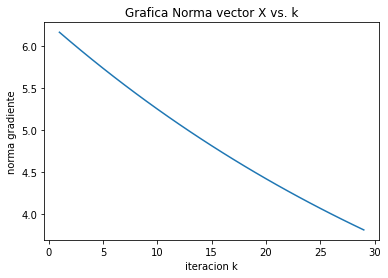

,Iter,Xn,p,Error
0,1,"[[-0.97], [1.98], [2.95]]","[[-3], [2], [5]]",6.164414
1,2,"[[-0.9408], [1.9602], [2.9008000000000003]]","[[-2.92], [1.9799999999999995], [4.92]]",6.054189
2,3,"[[-0.9123819999999999], [1.940596], [2.852386]]","[[-2.8418], [1.9604], [4.8414]]",5.946272
3,4,"[[-0.8847284], [1.92118412], [2.80474424]]","[[-2.76536], [1.9411879999999995], [4.764176]]",5.840616
4,5,"[[-0.8578219908], [1.901960596], [2.7578611964...","[[-2.69064092], [1.9223523999999999], [4.68830...",5.737176
5,6,"[[-0.831645945024], [1.882921776136], [2.71172...","[[-2.6176045776], [1.9038819863999992], [4.613...",5.635904
6,7,"[[-0.80618380836216], [1.86406411694736], [2.6...","[[-2.5462136661840002], [1.8857659188640001], ...",5.536758
7,8,"[[-0.7814194910254432], [1.8453841797710384], ...","[[-2.4764317336716797], [1.8679937176321597], ...",5.439693
8,9,"[[-0.757337259407224], [1.8268786272583801], [...","[[-2.4082231618219248], [1.850555251265821], [...",5.344666
9,10,"[[-0.7339217279464957], [1.808544220010274], [...","[[-2.341553146072828], [1.8334407248106088], [...",5.251635


In [56]:
gd_cuadratica(Q, c, epsilon, N, x0, 2, 0.01)

k:  1 
x 
 [[-0.7]
 [ 1.8]
 [ 2.5]] 
vec_gradiente 
 [[-3]
 [ 2]
 [ 5]] 
norm_vec_gradiente  6.164414002968976
k:  2 
x 
 [[-0.48]
 [ 1.62]
 [ 2.08]] 
vec_gradiente 
 [[-2.2]
 [ 1.8]
 [ 4.2]] 
norm_vec_gradiente  5.071488933242386
k:  3 
x 
 [[-0.322]
 [ 1.456]
 [ 1.726]] 
vec_gradiente 
 [[-1.58]
 [ 1.64]
 [ 3.54]] 
norm_vec_gradiente  4.209227957713861
k:  4 
x 
 [[-0.212 ]
 [ 1.3052]
 [ 1.4264]] 
vec_gradiente 
 [[-1.1  ]
 [ 1.508]
 [ 2.996]] 
norm_vec_gradiente  3.529883850780362
k:  5 
x 
 [[-0.13908]
 [ 1.1656 ]
 [ 1.17164]] 
vec_gradiente 
 [[-0.7292]
 [ 1.396 ]
 [ 2.5476]] 
norm_vec_gradiente  2.9951317834112072
k:  6 
x 
 [[-0.094704]
 [ 1.035736]
 [ 0.953872]] 
vec_gradiente 
 [[-0.44376]
 [ 1.29864]
 [ 2.17768]] 
norm_vec_gradiente  2.574039426582273
k:  7 
x 
 [[-0.0721896]
 [ 0.9145056]
 [ 0.7666712]] 
vec_gradiente 
 [[-0.225144]
 [ 1.212304]
 [ 1.872008]] 
norm_vec_gradiente  2.2416031676494392
k:  8 
x 
 [[-0.06630112]
 [ 0.80105264]
 [ 0.60478752]] 
vec_gradiente 
 [[-

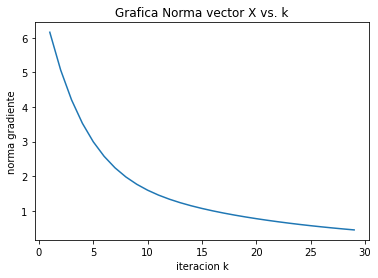

,Iter,Xn,p,Error
0,1,"[[-0.7], [1.8], [2.5]]","[[-3], [2], [5]]",6.164414
1,2,"[[-0.4799999999999999], [1.62], [2.08]]","[[-2.2], [1.7999999999999998], [4.2]]",5.071489
2,3,"[[-0.3219999999999999], [1.456], [1.726]]","[[-1.58], [1.6400000000000001], [3.54]]",4.209228
3,4,"[[-0.2119999999999999], [1.3052], [1.4264]]","[[-1.0999999999999996], [1.508], [2.996]]",3.529884
4,5,"[[-0.13907999999999993], [1.1656], [1.17163999...","[[-0.7291999999999996], [1.3959999999999997], ...",2.995132
5,6,"[[-0.09470399999999995], [1.035736], [0.953871...","[[-0.4437599999999997], [1.29864], [2.17767999...",2.574039
6,7,"[[-0.07218959999999998], [0.9145055999999999],...","[[-0.2251439999999998], [1.2123040000000003], ...",2.241603
7,8,"[[-0.06630111999999998], [0.8010526399999999],...","[[-0.05888479999999996], [1.1345296], [1.61883...",1.977690
8,9,"[[-0.07293563199999999], [0.6946907519999999],...","[[0.06634512000000015], [1.0636188799999997], ...",1.766245
9,10,"[[-0.08887943040000001], [0.5948525663999998],...","[[0.1594379840000002], [0.9983818559999998], [...",1.594653


In [57]:
gd_cuadratica(Q, c, epsilon, N, x0, 2, 0.1)

k:  1 
x 
 [[0.5]
 [1. ]
 [0.5]] 
vec_gradiente 
 [[-3]
 [ 2]
 [ 5]] 
norm_vec_gradiente  6.164414002968976
k:  2 
x 
 [[0. ]
 [0.5]
 [0. ]] 
vec_gradiente 
 [[1.]
 [1.]
 [1.]] 
norm_vec_gradiente  1.7320508075688772
k:  3 
x 
 [[-0.25]
 [ 0.  ]
 [-0.25]] 
vec_gradiente 
 [[0.5]
 [1. ]
 [0.5]] 
norm_vec_gradiente  1.224744871391589
k:  4 
x 
 [[-0.5 ]
 [-0.25]
 [-0.5 ]] 
vec_gradiente 
 [[0.5]
 [0.5]
 [0.5]] 
norm_vec_gradiente  0.8660254037844386
k:  5 
x 
 [[-0.625]
 [-0.5  ]
 [-0.625]] 
vec_gradiente 
 [[0.25]
 [0.5 ]
 [0.25]] 
norm_vec_gradiente  0.6123724356957945
k:  6 
x 
 [[-0.75 ]
 [-0.625]
 [-0.75 ]] 
vec_gradiente 
 [[0.25]
 [0.25]
 [0.25]] 
norm_vec_gradiente  0.4330127018922193
k:  7 
x 
 [[-0.8125]
 [-0.75  ]
 [-0.8125]] 
vec_gradiente 
 [[0.125]
 [0.25 ]
 [0.125]] 
norm_vec_gradiente  0.30618621784789724
k:  8 
x 
 [[-0.875 ]
 [-0.8125]
 [-0.875 ]] 
vec_gradiente 
 [[0.125]
 [0.125]
 [0.125]] 
norm_vec_gradiente  0.21650635094610965
k:  9 
x 
 [[-0.90625]
 [-0.875  ]
 [-

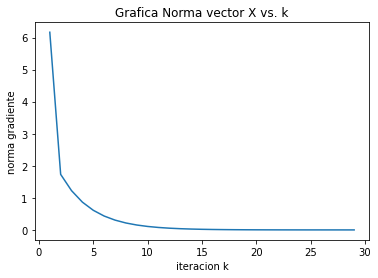

,Iter,Xn,p,Error
0,1,"[[0.5], [1.0], [0.5]]","[[-3], [2], [5]]",6.164414
1,2,"[[0.0], [0.5], [0.0]]","[[1.0], [1.0], [1.0]]",1.732051
2,3,"[[-0.25], [0.0], [-0.25]]","[[0.5], [1.0], [0.5]]",1.224745
3,4,"[[-0.5], [-0.25], [-0.5]]","[[0.5], [0.5], [0.5]]",0.866025
4,5,"[[-0.625], [-0.5], [-0.625]]","[[0.25], [0.5], [0.25]]",0.612372
5,6,"[[-0.75], [-0.625], [-0.75]]","[[0.25], [0.25], [0.25]]",0.433013
6,7,"[[-0.8125], [-0.75], [-0.8125]]","[[0.125], [0.25], [0.125]]",0.306186
7,8,"[[-0.875], [-0.8125], [-0.875]]","[[0.125], [0.125], [0.125]]",0.216506
8,9,"[[-0.90625], [-0.875], [-0.90625]]","[[0.0625], [0.125], [0.0625]]",0.153093
9,10,"[[-0.9375], [-0.90625], [-0.9375]]","[[0.0625], [0.0625], [0.0625]]",0.108253


In [58]:
gd_cuadratica(Q, c, epsilon, N, x0, 2, 0.5)

k:  1 
x 
 [[ 2]
 [ 0]
 [-2]] 
vec_gradiente 
 [[-3]
 [ 2]
 [ 5]] 
norm_vec_gradiente  6.164414002968976
k:  2 
x 
 [[-3]
 [ 0]
 [ 1]] 
vec_gradiente 
 [[ 5]
 [ 0]
 [-3]] 
norm_vec_gradiente  5.830951894845301
k:  3 
x 
 [[ 2]
 [-2]
 [-2]] 
vec_gradiente 
 [[-5]
 [ 2]
 [ 3]] 
norm_vec_gradiente  6.164414002968976
k:  4 
x 
 [[-5]
 [ 2]
 [-1]] 
vec_gradiente 
 [[ 7]
 [-4]
 [-1]] 
norm_vec_gradiente  8.12403840463596
k:  5 
x 
 [[ 6]
 [-8]
 [ 2]] 
vec_gradiente 
 [[-11]
 [ 10]
 [ -3]] 
norm_vec_gradiente  15.165750888103101
k:  6 
x 
 [[-15]
 [ 16]
 [-11]] 
vec_gradiente 
 [[ 21]
 [-24]
 [ 13]] 
norm_vec_gradiente  34.438350715445125
k:  7 
x 
 [[ 30]
 [-42]
 [ 26]] 
vec_gradiente 
 [[-45]
 [ 58]
 [-37]] 
norm_vec_gradiente  82.20705565825844
k:  8 
x 
 [[-73]
 [ 98]
 [-69]] 
vec_gradiente 
 [[ 103]
 [-140]
 [  95]] 
norm_vec_gradiente  198.07574308834486
k:  9 
x 
 [[ 170]
 [-240]
 [ 166]] 
vec_gradiente 
 [[-243]
 [ 338]
 [-235]] 
norm_vec_gradiente  478.0355635305809
k:  10 
x 
 [[-41

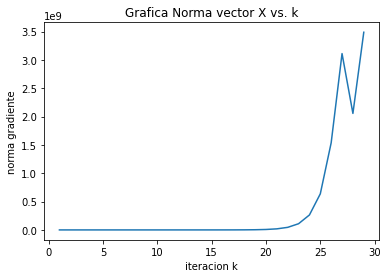

,Iter,Xn,p,Error
0,1,"[[2], [0], [-2]]","[[-3], [2], [5]]",6.164414e+00
1,2,"[[-3], [0], [1]]","[[5], [0], [-3]]",5.830952e+00
2,3,"[[2], [-2], [-2]]","[[-5], [2], [3]]",6.164414e+00
3,4,"[[-5], [2], [-1]]","[[7], [-4], [-1]]",8.124038e+00
4,5,"[[6], [-8], [2]]","[[-11], [10], [-3]]",1.516575e+01
5,6,"[[-15], [16], [-11]]","[[21], [-24], [13]]",3.443835e+01
6,7,"[[30], [-42], [26]]","[[-45], [58], [-37]]",8.220706e+01
7,8,"[[-73], [98], [-69]]","[[103], [-140], [95]]",1.980757e+02
8,9,"[[170], [-240], [166]]","[[-243], [338], [-235]]",4.780356e+02
9,10,"[[-411], [576], [-407]]","[[581], [-816], [573]]",1.154013e+03


In [59]:
gd_cuadratica(Q, c, epsilon, N, x0, 2, 1)

k:  1 
x 
 [[ 2.]
 [ 0.]
 [-2.]] 
vec_gradiente 
 [[-3]
 [ 2]
 [ 5]] 
norm_vec_gradiente  6.164414002968976
k:  2 
x 
 [[-0.5]
 [ 0. ]
 [-0.5]] 
vec_gradiente 
 [[ 5.]
 [ 0.]
 [-3.]] 
norm_vec_gradiente  5.830951894845301
k:  3 
x 
 [[-0.5       ]
 [-0.33333333]
 [-0.5       ]] 
vec_gradiente 
 [[0.]
 [1.]
 [0.]] 
norm_vec_gradiente  1.0
k:  4 
x 
 [[-0.58333333]
 [-0.41666667]
 [-0.58333333]] 
vec_gradiente 
 [[0.33333333]
 [0.33333333]
 [0.33333333]] 
norm_vec_gradiente  0.5773502691896257
k:  5 
x 
 [[-0.63333333]
 [-0.48333333]
 [-0.63333333]] 
vec_gradiente 
 [[0.25      ]
 [0.33333333]
 [0.25      ]] 
norm_vec_gradiente  0.4859126579037751
k:  6 
x 
 [[-0.66944444]
 [-0.53333333]
 [-0.66944444]] 
vec_gradiente 
 [[0.21666667]
 [0.3       ]
 [0.21666667]] 
norm_vec_gradiente  0.42882267767562027
k:  7 
x 
 [[-0.69722222]
 [-0.57222222]
 [-0.69722222]] 
vec_gradiente 
 [[0.19444444]
 [0.27222222]
 [0.19444444]] 
norm_vec_gradiente  0.3869395588747967
k:  8 
x 
 [[-0.71944444]
 [-0.

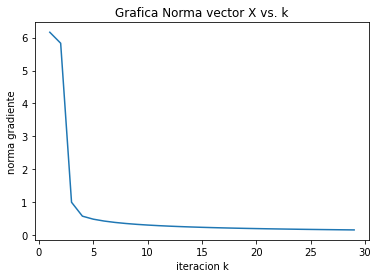

,Iter,Xn,p,Error
0,1,"[[2.0], [0.0], [-2.0]]","[[-3], [2], [5]]",6.164414
1,2,"[[-0.5], [0.0], [-0.5]]","[[5.0], [0.0], [-3.0]]",5.830952
2,3,"[[-0.5], [-0.3333333333333333], [-0.5]]","[[0.0], [1.0], [0.0]]",1.000000
3,4,"[[-0.5833333333333333], [-0.41666666666666663]...","[[0.33333333333333326], [0.33333333333333337],...",0.577350
4,5,"[[-0.6333333333333333], [-0.4833333333333333],...","[[0.2500000000000001], [0.33333333333333326], ...",0.485913
5,6,"[[-0.6694444444444444], [-0.5333333333333333],...","[[0.21666666666666667], [0.30000000000000004],...",0.428823
6,7,"[[-0.6972222222222222], [-0.5722222222222222],...","[[0.19444444444444453], [0.27222222222222214],...",0.386940
7,8,"[[-0.7194444444444444], [-0.6034722222222222],...","[[0.1777777777777778], [0.25], [0.177777777777...",0.354556
8,9,"[[-0.7377314814814815], [-0.6292438271604938],...","[[0.1645833333333333], [0.2319444444444445], [...",0.328593
9,10,"[[-0.7531095679012345], [-0.6509413580246913],...","[[0.1537808641975308], [0.21697530864197545], ...",0.307206


In [55]:
gd_cuadratica(Q, c, epsilon, N, x0, 3)

En las graficas de la funciones se puede apreciar que la de mejor comportamiento es definitivamente la primer opción, con un step size exacto, sin embargo, tambien es importante mencionar que es la que conlleva un mayor peso computacional. 
La segunda mejor opcion es la de un lr constante, si se toma un lr adecuado, como es el caso de 0.5, sin embargo para un numero mayor puede llevar a la divergencia.

## Problema 2

1 
xk [0.1 0. ] 
derivada_rosenbrock pk [-2  0] 
norm_vec_gradiente 2.0
2 
xk [0.17 0.1 ] 
derivada_rosenbrock pk [-1.4 -2. ] 
norm_vec_gradiente 2.441311123146741
3 
xk [ 0.49474 -0.611  ] 
derivada_rosenbrock pk [-6.4948 14.22  ] 
norm_vec_gradiente 15.633004415018895
4 
xk [-7.92238392  7.94667668] 
derivada_rosenbrock pk [ 168.34247835 -171.15353352] 
norm_vec_gradiente 240.06816126366374
5 
xk [8678.67391871  556.12157926] 
derivada_rosenbrock pk [-173731.92605259  -10963.49805164] 
norm_vec_gradiente 174077.5126760274
6 
xk [-1.30733504e+13  7.53188805e+08] 
derivada_rosenbrock pk [ 2.61467008e+14 -1.50637650e+10] 
norm_vec_gradiente 261467008831496.94
7 
xk [4.46879777e+40 1.70912491e+27] 
derivada_rosenbrock pk [-8.93759554e+41 -3.41824982e+28] 
norm_vec_gradiente 8.93759553661713e+41
8 
xk [-1.78485155e+123  1.99701535e+082] 
derivada_rosenbrock pk [ 3.56970309e+124 -3.99403070e+083] 
norm_vec_gradiente 3.5697030946777474e+124
9 
xk [            inf 3.18569505e+247] 
derivada_

<ipython-input-61-6c144f67a157>:18: RuntimeWarning: overflow encountered in double_scalars
  f = ((1 - x[0])**2) + (100*((x[1] - x[0]**2)**2))
<ipython-input-61-6c144f67a157>:2: RuntimeWarning: overflow encountered in double_scalars
  dx = 2*( (200*(point[0]**3)) - (200*point[0]*point[1]) + point[0] - 1 )


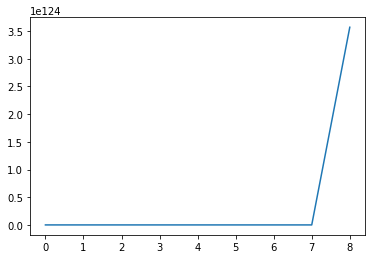

In [61]:
def derivada_rosenbrock( point ):
    dx = 2*( (200*(point[0]**3)) - (200*point[0]*point[1]) + point[0] - 1 )
    dy = 200*(point[1] - (point[0]**2))
    return dx, dy

def prob1(x1, x2, alfa):
    
    x = np.array([x1, x2])
    k = 0
    xi = []
    
    fi = np.array(derivada_rosenbrock(x))
    norm_vec_gradiente = np.linalg.norm(fi)
    
    while((k < 1000) and (norm_vec_gradiente > 1E-6) and (math.isinf(norm_vec_gradiente) == False)):
        
        # objective function for second case
        f = ((1 - x[0])**2) + (100*((x[1] - x[0]**2)**2))
        # append the point and its obj function to ai as 1D list
        xi.append(norm_vec_gradiente)
        
        # Derrivative for second case
        fi = np.array(derivada_rosenbrock(x))
        # set the new point based on its 
        x = x - np.dot(alfa,fi)
        
        k+=1
        norm_vec_gradiente = np.linalg.norm(fi)
        
        print(k, "\nxk", x, "\nderivada_rosenbrock pk", fi, "\nnorm_vec_gradiente", norm_vec_gradiente)
    
    plt.plot(xi)
    plt.show()
    
prob1(0, 0, 0.05)

1 
xk [0.002 0.   ] 
derivada_rosenbrock pk [-2  0] 
norm_vec_gradiente 2.0
2 
xk [3.9959968e-03 8.0000000e-07] 
derivada_rosenbrock pk [-1.9959968e+00 -8.0000000e-04] 
norm_vec_gradiente 1.9959969603208918
3 
xk [5.98798056e-03 3.83359809e-06] 
derivada_rosenbrock pk [-1.99198376 -0.0030336 ] 
norm_vec_gradiente 1.9919860718400209
4 
xk [7.97592790e-03 1.02380607e-05] 
derivada_rosenbrock pk [-1.98794734 -0.00640446] 
norm_vec_gradiente 1.9879576557097585
5 
xk [9.95980575e-03 2.09135337e-05] 
derivada_rosenbrock pk [-1.98387785 -0.01067547] 
norm_vec_gradiente 1.98390657335236
6 
xk [1.19395743e-02 3.65703731e-05] 
derivada_rosenbrock pk [-1.97976851 -0.01565684] 
norm_vec_gradiente 1.9798304197956191
7 
xk [1.39151890e-02 5.77669852e-05] 
derivada_rosenbrock pk [-1.97561469 -0.02119661] 
norm_vec_gradiente 1.9757284016792136
8 
xk [1.58866023e-02 8.49400849e-05] 
derivada_rosenbrock pk [-1.97141338 -0.0271731 ] 
norm_vec_gradiente 1.971600646619043
9 
xk [0.01785377 0.00011843] 
der

171 
xk [0.26740106 0.06846238] 
derivada_rosenbrock pk [-1.1439181  -0.60762239] 
norm_vec_gradiente 1.295281283603757
172 
xk [0.268541   0.06907057] 
derivada_rosenbrock pk [-1.13993648 -0.60819017] 
norm_vec_gradiente 1.2920334598579664
173 
xk [0.26967697 0.06967931] 
derivada_rosenbrock pk [-1.13597464 -0.60874012] 
norm_vec_gradiente 1.2887990231706654
174 
xk [0.27080901 0.07028858] 
derivada_rosenbrock pk [-1.13203253 -0.60927249] 
norm_vec_gradiente 1.2855779313576419
175 
xk [0.27193712 0.07089837] 
derivada_rosenbrock pk [-1.12811008 -0.60978753] 
norm_vec_gradiente 1.2823701416084923
176 
xk [0.27306132 0.07150865] 
derivada_rosenbrock pk [-1.12420721 -0.6102855 ] 
norm_vec_gradiente 1.2791756105113343
177 
xk [0.27418165 0.07211942] 
derivada_rosenbrock pk [-1.12032386 -0.61076664] 
norm_vec_gradiente 1.275994294076933
178 
xk [0.27529811 0.07273065] 
derivada_rosenbrock pk [-1.11645996 -0.61123118] 
norm_vec_gradiente 1.2728261477622749
179 
xk [0.27641072 0.07334233] 
d

derivada_rosenbrock pk [-0.80256187 -0.60239104] 
norm_vec_gradiente 1.0034841911791836
284 
xk [0.3752439  0.13780006] 
derivada_rosenbrock pk [-0.80029041 -0.60198967] 
norm_vec_gradiente 1.0014271380280468
285 
xk [0.37604193 0.13840164] 
derivada_rosenbrock pk [-0.79802979 -0.60158528] 
norm_vec_gradiente 0.9993780054518787
286 
xk [0.37683771 0.13900282] 
derivada_rosenbrock pk [-0.79577993 -0.60117792] 
norm_vec_gradiente 0.99733675192569
287 
xk [0.37763125 0.13960359] 
derivada_rosenbrock pk [-0.79354078 -0.60076764] 
norm_vec_gradiente 0.9953033361404253
288 
xk [0.37842256 0.14020394] 
derivada_rosenbrock pk [-0.79131227 -0.60035449] 
norm_vec_gradiente 0.9932777170029329
289 
xk [0.37921166 0.14080388] 
derivada_rosenbrock pk [-0.78909433 -0.59993852] 
norm_vec_gradiente 0.9912598536358163
290 
xk [0.37999854 0.1414034 ] 
derivada_rosenbrock pk [-0.7868869  -0.59951979] 
norm_vec_gradiente 0.9892497053773165
291 
xk [0.38078323 0.1420025 ] 
derivada_rosenbrock pk [-0.7846899

norm_vec_gradiente 0.7783311428111978
423 
xk [0.46845369 0.21678892] 
derivada_rosenbrock pk [-0.56591067 -0.53251419] 
norm_vec_gradiente 0.7770625804310641
424 
xk [0.46901836 0.21732091] 
derivada_rosenbrock pk [-0.56466868 -0.53198848] 
norm_vec_gradiente 0.7757979538243156
425 
xk [0.46958179 0.21785237] 
derivada_rosenbrock pk [-0.56343147 -0.53146301] 
norm_vec_gradiente 0.7745372446307808
426 
xk [0.47014399 0.21838331] 
derivada_rosenbrock pk [-0.56219899 -0.53093778] 
norm_vec_gradiente 0.7732804345986644
427 
xk [0.47070496 0.21891372] 
derivada_rosenbrock pk [-0.56097124 -0.5304128 ] 
norm_vec_gradiente 0.7720275055837872
428 
xk [0.47126471 0.21944361] 
derivada_rosenbrock pk [-0.55974818 -0.52988808] 
norm_vec_gradiente 0.7707784395489095
429 
xk [0.47182324 0.21997297] 
derivada_rosenbrock pk [-0.55852979 -0.52936363] 
norm_vec_gradiente 0.7695332185630146
430 
xk [0.47238056 0.22050181] 
derivada_rosenbrock pk [-0.55731604 -0.52883944] 
norm_vec_gradiente 0.76829182480

derivada_rosenbrock pk [-0.42754588 -0.46223482] 
norm_vec_gradiente 0.6296479279090856
566 
xk [0.53854298 0.28772192] 
derivada_rosenbrock pk [-0.42678606 -0.46177904] 
norm_vec_gradiente 0.6287974457570216
567 
xk [0.538969   0.28818324] 
derivada_rosenbrock pk [-0.4260286  -0.46132386] 
norm_vec_gradiente 0.6279490996919372
568 
xk [0.53939428 0.28864411] 
derivada_rosenbrock pk [-0.42527349 -0.46086927] 
norm_vec_gradiente 0.6271028814252513
569 
xk [0.5398188  0.28910453] 
derivada_rosenbrock pk [-0.42452071 -0.46041528] 
norm_vec_gradiente 0.6262587827110522
570 
xk [0.54024257 0.28956449] 
derivada_rosenbrock pk [-0.42377026 -0.45996188] 
norm_vec_gradiente 0.6254167953458666
571 
xk [0.54066559 0.290024  ] 
derivada_rosenbrock pk [-0.42302213 -0.45950908] 
norm_vec_gradiente 0.6245769111683865
572 
xk [0.54108787 0.29048305] 
derivada_rosenbrock pk [-0.4222763  -0.45905688] 
norm_vec_gradiente 0.62373912205917
573 
xk [0.5415094  0.29094166] 
derivada_rosenbrock pk [-0.4215327

derivada_rosenbrock pk [-0.33862943 -0.40298095] 
norm_vec_gradiente 0.5263682559064081
709 
xk [0.59276268 0.34935643] 
derivada_rosenbrock pk [-0.33812258 -0.40260679] 
norm_vec_gradiente 0.5257557463517464
710 
xk [0.5931003  0.34975867] 
derivada_rosenbrock pk [-0.33761704 -0.40223314] 
norm_vec_gradiente 0.5251445198363364
711 
xk [0.59343741 0.35016053] 
derivada_rosenbrock pk [-0.3371128  -0.40186002] 
norm_vec_gradiente 0.5245345721767258
712 
xk [0.59377402 0.35056201] 
derivada_rosenbrock pk [-0.33660985 -0.40148743] 
norm_vec_gradiente 0.5239258992078317
713 
xk [0.59411013 0.35096313] 
derivada_rosenbrock pk [-0.3361082  -0.40111536] 
norm_vec_gradiente 0.5233184967829888
714 
xk [0.59444574 0.35136387] 
derivada_rosenbrock pk [-0.33560783 -0.40074381] 
norm_vec_gradiente 0.5227123607737102
715 
xk [0.59478085 0.35176425] 
derivada_rosenbrock pk [-0.33510874 -0.40037278] 
norm_vec_gradiente 0.5221074870696977
716 
xk [0.59511546 0.35216425] 
derivada_rosenbrock pk [-0.33461

xk [0.63619207 0.40296977] 
derivada_rosenbrock pk [-0.27740424 -0.35442368] 
norm_vec_gradiente 0.4500769439141633
852 
xk [0.63646911 0.40332388] 
derivada_rosenbrock pk [-0.27704364 -0.3541165 ] 
norm_vec_gradiente 0.44961280572846773
853 
xk [0.6367458  0.40367769] 
derivada_rosenbrock pk [-0.27668383 -0.35380974] 
norm_vec_gradiente 0.44914950040528223
854 
xk [0.63702212 0.4040312 ] 
derivada_rosenbrock pk [-0.27632481 -0.35350339] 
norm_vec_gradiente 0.4486870256190874
855 
xk [0.63729809 0.40438439] 
derivada_rosenbrock pk [-0.27596658 -0.35319745] 
norm_vec_gradiente 0.44822537905322113
856 
xk [0.6375737  0.40473729] 
derivada_rosenbrock pk [-0.27560914 -0.35289192] 
norm_vec_gradiente 0.4477645583998539
857 
xk [0.63784895 0.40508987] 
derivada_rosenbrock pk [-0.27525247 -0.35258679] 
norm_vec_gradiente 0.4473045613599133
858 
xk [0.63812385 0.40544216] 
derivada_rosenbrock pk [-0.27489659 -0.35228208] 
norm_vec_gradiente 0.4468453856430254
859 
xk [0.63839839 0.40579413] 
d

994 
xk [0.67249478 0.45067873] 
derivada_rosenbrock pk [-0.23281623 -0.3143565 ] 
norm_vec_gradiente 0.3911820604367226
995 
xk [0.67272733 0.45099283] 
derivada_rosenbrock pk [-0.23254728 -0.31410144] 
norm_vec_gradiente 0.3908170269385857
996 
xk [0.67295961 0.45130668] 
derivada_rosenbrock pk [-0.23227884 -0.3138467 ] 
norm_vec_gradiente 0.39045256687259816
997 
xk [0.67319162 0.45162027] 
derivada_rosenbrock pk [-0.23201091 -0.31359228] 
norm_vec_gradiente 0.3900886788431671
998 
xk [0.67342336 0.45193361] 
derivada_rosenbrock pk [-0.23174349 -0.31333818] 
norm_vec_gradiente 0.389725361459278
999 
xk [0.67365484 0.45224669] 
derivada_rosenbrock pk [-0.23147658 -0.31308439] 
norm_vec_gradiente 0.38936261333463335
1000 
xk [0.67388605 0.45255952] 
derivada_rosenbrock pk [-0.23121018 -0.31283093] 
norm_vec_gradiente 0.3890004330875509


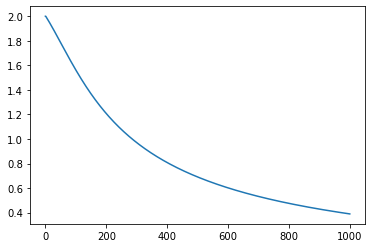

In [63]:
prob1(0, 0, 0.001)

Para este problema se observa que debido al punto y el lr, donde se encuentra el problema diverge, sin embago, al reducir el lr el problema tiene una solucion mejor como se muestra en las demas iteraciones.

# Fase 3

In [242]:
d = 100 #cantidad de columnas para el dataset.
n = 1000 #cantidad de observaciones para el dataset.
A = np.random.normal(0,1, size=(n,d))
x_true = np.random.normal(0,1, size=(d,1))
b = A.dot(x_true) + np.random.normal(0,0.5,size=(n,1))

print("A\n", A.shape,"\nx_true\n", x_true.shape,"\nb\n", b.shape)

A
 (1000, 100) 
x_true
 (100, 1) 
b
 (1000, 1)


In [200]:
def f_errores(x, a, b):
    print(a.shape, x_optimo.shape, b.shape)
    error = np.square((np.dot(a, x)) - b)
    return error.sum()

## Parte 1 Solucion cerrada

In [201]:
def gd_solucion_cerrada(A, b):
    x_optimo = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
    #print(A.shape, x_optimo.shape, b.shape)
    return f_errores(x_optimo, A, b)

gd_solucion_cerrada(A, b)

(1000, 100) (100, 1) (1000, 1)


246.03273930007003

Este metodo no es utilizado por el costo computacional que representa el calculo de la matrix inversa sobre todas las observaciones, principalmente si se debe calcular para millones de datos. Otra de la razones es que no siempre se puede  asegurar que la matriz sea realmente invertible.

## Parte 2 GD

In [328]:
def gradient_descent(x, y, theta, lr, epochs):
    m = x.shape[0]
    print("theta:", theta.shape, "x:", x.shape, "y:", b.shape)
    k = 1
    same_cost = 0
    list_cost = []
    list_index = []
    while(k <= epochs):
        y_hat = np.dot(x, theta)
        #print("y_hat", y_hat.shape)
        loss = y_hat - y
        #print("loss:", loss.shape)
        cost = np.sum(loss ** 2) / (2 * m)
        #print("cost:", cost, k)
        
        #Criterios adicionales a epoch para detener el algoritmo
        #Si pasan 10 iteraciones y el modelo no mejora con 5 decimales se detiene
        #Si el nuevo costo es mayor al anterior se detiene
        if(k == 1):
            past_cost = round(cost, 5)
        else:
            if(round(cost, 5) == past_cost):
                same_cost += 1
            elif(round(cost, 5) > past_cost):
                break
            else:
                past_cost = round(cost, 5)
                same_cost =0
        
        if(same_cost == 10):
            break
            
        list_cost.append(cost)
        list_index.append(k)

        gradient = np.dot(x.T, loss) / m
        #print("gradient:", gradient.shape)

        theta = theta - lr * gradient
        #print("theta:", theta.shape)

        #print(np.linalg.norm(theta))

        k+=1
    
    return theta, list_cost, list_index
    

(100, 1)
theta: (100, 1) x: (1000, 100) y: (1000, 1)
theta: (100, 1) x: (1000, 100) y: (1000, 1)
theta: (100, 1) x: (1000, 100) y: (1000, 1)


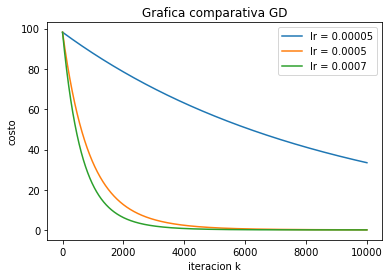

In [329]:
theta = np.ones((d,1))
print(theta.shape)
GD_1 = gradient_descent(A, b, theta, 0.00005, 10000)
GD_2 = gradient_descent(A, b, theta, 0.0005, 10000)
GD_3 = gradient_descent(A, b, theta, 0.0007, 10000)
#GD[1]
plt.plot(GD_1[2], GD_1[1], label='lr = 0.00005')
plt.plot(GD_2[2], GD_2[1], label='lr = 0.0005')
plt.plot(GD_3[2], GD_3[1], label='lr = 0.0007')

plt.title('Grafica comparativa GD')
plt.xlabel('iteracion k')
plt.ylabel('costo')
plt.legend(loc="upper right")
plt.show()

(100, 1)
theta: (100, 1) x: (1000, 100) y: (1000, 1)
theta: (100, 1) x: (1000, 100) y: (1000, 1)
theta: (100, 1) x: (1000, 100) y: (1000, 1)


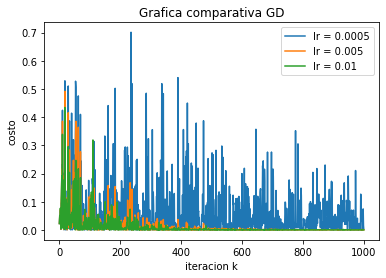

In [428]:
def stochastic_gradient_descent(x, y, theta, lr, iteraciones):
    m = x.shape[0]
    print("theta:", theta.shape, "x:", x.shape, "y:", b.shape)
    #k = 0
    same_cost = 0
    list_cost = []
    list_index = []
    for j in range(0, iteraciones):
        i = j
        y_hat = np.dot(x[i].reshape(len(x[i]),1).T, theta)
        #print("y_hat", y_hat, y[i][0])
        loss = y_hat[0,0] - y[i][0]
        #print("loss:", loss)
        #cost = (loss ** 2)
        #print("cost:", cost, i)
        
        
        y_hat_total = np.dot(x, theta)
        #print("y_hat", y_hat.shape)
        loss_total = y_hat_total - y
        #print("loss:", loss.shape)
        cost = np.sum(loss ** 2) / (2 * m)
        
            
        list_cost.append(cost)
        list_index.append(j)

        gradient = (x[i] * loss)
        gradient = gradient.reshape(gradient.shape[0], 1)
        #print("gradient:", gradient.shape)

        theta = theta - lr * gradient
        #print("theta:", theta.shape)

    return theta, list_cost, list_index

theta = np.ones((d,1))
print(theta.shape)
SGD_1 = stochastic_gradient_descent(A, b, theta, 0.0005, 1000)
SGD_2 = stochastic_gradient_descent(A, b, theta, 0.005, 1000)
SGD_3 = stochastic_gradient_descent(A, b, theta, 0.01, 1000)

plt.plot(SGD_1[2], SGD_1[1], label='lr = 0.0005')
plt.plot(SGD_2[2], SGD_2[1], label='lr = 0.005')
plt.plot(SGD_3[2], SGD_3[1], label='lr = 0.01')

plt.title('Grafica comparativa GD')
plt.xlabel('iteracion k')
plt.ylabel('costo')
plt.legend(loc="upper right")
plt.show()

theta: (100, 1) x: (1000, 100) y: (1000, 1) iteraciones: 39
theta: (100, 1) x: (1000, 100) y: (1000, 1) iteraciones: 19
theta: (100, 1) x: (1000, 100) y: (1000, 1) iteraciones: 9


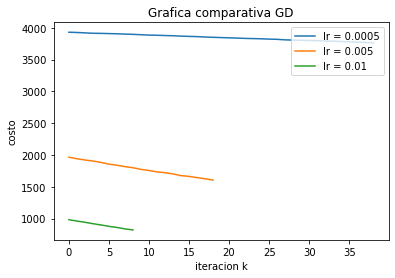

In [464]:
def minibatch_gradient_descent(x, y, theta, lr, batch_size):
    m = x.shape[0]
    iteraciones = int(m / batch_size) - 1
    print("theta:", theta.shape, "x:", x.shape, "y:", b.shape, "iteraciones:", iteraciones)
    inicio = 0 
    final = batch_size
    
    same_cost = 0
    list_cost = []
    list_index = []
    for j in range(0, iteraciones):
        #print(x[inicio:final].shape)
        y_hat = np.dot(x[inicio:final], theta)
        #print("y_hat", y_hat, y_hat.shape)
        loss = y_hat - y[inicio:final]
        #print("loss:", loss.shape)
        
        #Evaluacion del modelo por iteracion
        y_hat_total = np.dot(x, theta)
        #print("y_hat", y_hat.shape)
        loss_total = y_hat_total - y
        #print("loss:", loss_total)
        cost = np.sum(loss_total ** 2) / (2 * batch_size)
        
            
        list_cost.append(cost)
        list_index.append(j)
        
        gradient = np.dot(x[inicio:final].T, loss) / batch_size

        theta = theta - lr * gradient
        #print("theta:", theta.shape)
        
        inicio = final
        final = final + batch_size
        #print("Final: ", final)
        

    return theta, list_cost, list_index

theta = np.ones((d,1))
MGD_1 = minibatch_gradient_descent(A, b, theta, 0.0005, 25)
MGD_2 = minibatch_gradient_descent(A, b, theta, 0.005, 50)
MGD_3 = minibatch_gradient_descent(A, b, theta, 0.01, 100)

plt.plot(MGD_1[2], MGD_1[1], label='lr = 0.0005')
plt.plot(MGD_2[2], MGD_2[1], label='lr = 0.005')
plt.plot(MGD_3[2], MGD_3[1], label='lr = 0.01')

plt.title('Grafica comparativa GD')
plt.xlabel('iteracion k')
plt.ylabel('costo')
plt.legend(loc="upper right")
plt.show()

El algoritmo de mejor desempeño para este ejemplo fue el de SGD, seguido de MGD y por ultimo BGD. Para el de Batch, se puede apreciar que es necesario muchas iteraciones y un lr adecuado, para lograr resolver los problemas efectivamente. Como en lo casos cuando se tiene un LR mas grande, sin embargo hay que tener en consideracion que puede llevar a la divergencia.

Para el caso de SGD, se puede apreciar como el algoritmo oscila entre valore grandes y pequeños de la funcion de costo, a pesar de esta oscilacion el algoritmo disminuye de manera muy efectiva el valor de costo.

Para MBGD, este algoritmo tiene la particularidad de funcionar de manera similar a SGD, sin embargo utiliza batch de tamaño definido, por lo que es la mejor opcion para implementar.